In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
# 동전을 10번 던져서 앞면이 6개 나온 경우
# 베이즈 추정법으로 계산한 베르누이분포 모수의 분포

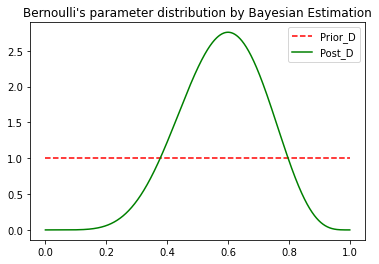

In [2]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1

plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="Prior_D")  #사전분포
a1, b1 = 6 + 1, 4 + 1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="Post_D")  #사후분포
plt.legend()
plt.title("Bernoulli's parameter distribution by Bayesian Estimation")

plt.show();

In [ ]:
# 데이터 개수가 200개까지 증가할 때 추정 결과의 변이 탐색

초기 추정: 모드 = 모름
0times Estimation: Mode = 0.64
1times Estimation: Mode = 0.69
2times Estimation: Mode = 0.65


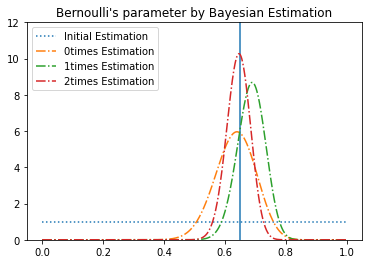

In [3]:
mu0 = 0.65
a, b = 1, 1
print("초기 추정: 모드 = 모름")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls=":", label="Initial Estimation")  # 초기추정

np.random.seed(0)

for i in range(3):
    x = sp.stats.bernoulli(mu0).rvs(50)
    N0, N1 = np.bincount(x, minlength=2)
    a, b = a + N1, b + N0
    plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls="-.", label="{}times Estimation".format(i))
    print("{}times Estimation: Mode = {:4.2f}".format(i, (a - 1)/(a + b - 2)))


plt.vlines(x=0.65, ymin=0, ymax=12)
plt.ylim(0, 12)
plt.legend()
plt.title("Bernoulli's parameter by Bayesian Estimation")

plt.show();

In [ ]:
# 카테고리분포의 모수 추정
# 세 종류의 붓꽃의 비율을 카테고리분포로 나타내고자 한다. 카테고리분포의 모수는 디리클리분포로 표현한다.

In [4]:
def plot_dirichlet(alpha, n):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])

    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
    plt.axis("equal")
    plt.title("Estimation Report: {} Estimation".format(n))
    plt.show()

mu0 = np.array([0.3, 0.5, 0.2])

np.random.seed(0)

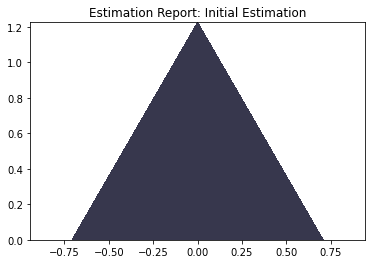

In [5]:
a0 = np.ones(3)
plot_dirichlet(a0, "Initial")  # 초기

Count of Iris' types =[10 32  8]
1st Estimation H-parameter: [0.2  0.64 0.16]


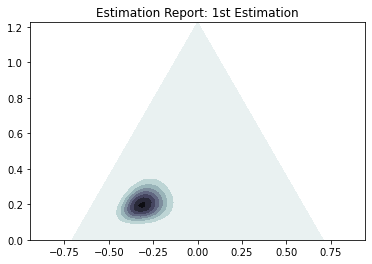

In [6]:
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
a1 = a0 + N1

print("Count of Iris' types ={}".format(N1))
print("1st Estimation H-parameter:", (a1 - 1)/(a1.sum() - 3))

plot_dirichlet(a1, "1st")

Count of Iris' types =[24 19  7]
2nd Estimation H-parameter: [0.34 0.51 0.15]


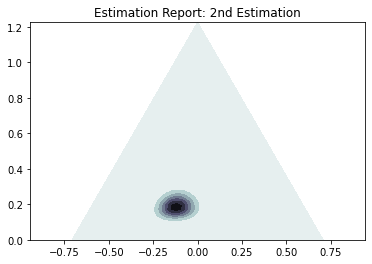

In [7]:
x2 = np.random.choice(3, 50, p=mu0)
N2 = np.bincount(x2, minlength=3)
a2 = a1 + N2

print("Count of Iris' types ={}".format(N2))
print("2nd Estimation H-parameter:", (a2 - 1)/(a2.sum() - 3))

plot_dirichlet(a2, "2nd")

In [ ]:
# 정규분포의 기댓값 모수 추정
# 실제 기댓값이 2, 분산이 4인 정규분포에서 나온 데이터를 이용하여 기댓값 모수를 순차적 베이즈 추정
# 차수별로 100개의 데이터를 사용하였다. 초기 추정값 즉, 사전확률분포로는 기댓값이 0, 분산이 1인 정규분포를 사용

0times Estimation: 1.98
1times Estimation: 2.07
2times Estimation: 2.05
3times Estimation: 2.03


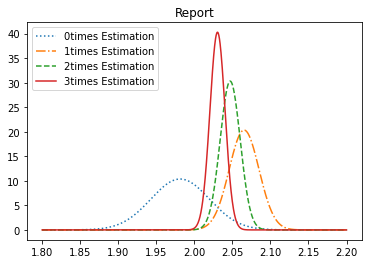

In [8]:
mu, sigma2 = 2, 4
mu0, sigma20 = 0, 1
xx = np.linspace(1.8, 2.2, 1000)
np.random.seed(1)
N = 100
ls = [":", "-.", "--", "-"]
for i in range(4):
    x = sp.stats.norm(mu).rvs(N)
    mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
        (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
    sigma20 = 1/(1/sigma20 + N/sigma2)
    plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), ls=ls[i], label="{}times Estimation".format(i))
    print("{}times Estimation: {:4.2f}".format(i, mu0))
plt.legend()
plt.title("Report") # 정규분포의 기댓값을 베이즈 추정법으로 추정한 결과

plt.show();